# Vitesse du son dans le cristal de Sr2SnHg 

### Imports:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import *

### Téléchargement du fichier:

In [3]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
with MPRester("QpuaQDTCSV1bdImr") as m:

    # Structure for material id
    bandStructure = m.get_phonon_bandstructure_by_material_id("mp-867169")

### Visualisation de la zone de Brillouin:

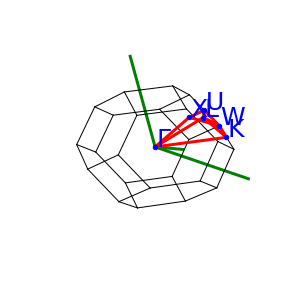

In [4]:
PhononBSPlotter(bandStructure).plot_brillouin()

### Visualisation de la structure des bandes de phonons:

Sur le graphe ci dessous nous pouvons visualiser les bandes de phonons dans notre matériaux. Nous allons ainsi étudier les branches acoustiques dans les différentes directions de la zone de Brillouin. Ces branches sont les bandes dont la longueur d'onde du phonon associé est la plus grande et où la fréquence s'annule. On étudira donc les chemins suivants: Gamma-X; K-Gamma et Gamma-L.

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

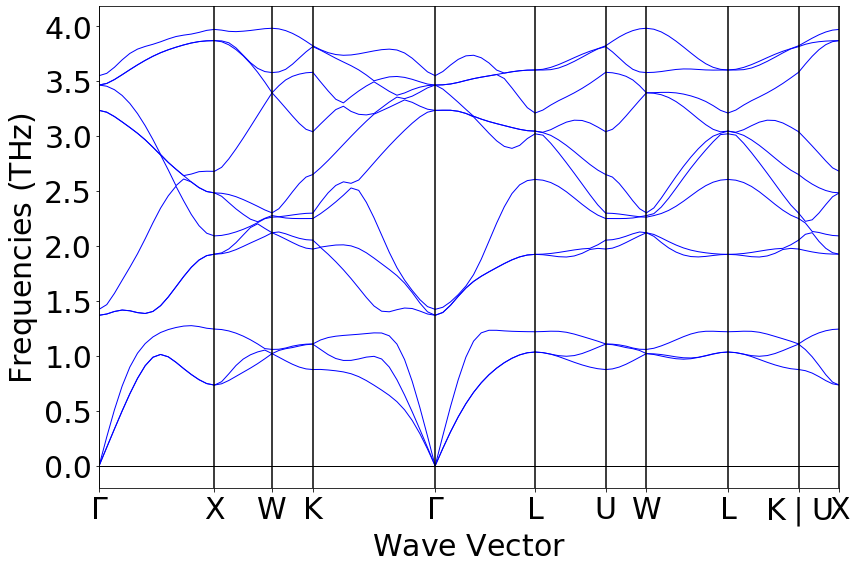

In [5]:
PhononBSPlotter(bandStructure).get_plot()

### Récupération des données

In [6]:
data = PhononBSPlotter(bandStructure).bs_plot_data()
frequency = data['frequency']
distances = data['distances']

### Branche acoustique de direction Gamma - X

In [7]:
vitesse1 = 2*np.pi*np.abs((frequency[0][1][1]-frequency[0][1][0])*(10**12))/((distances[0][1]-distances[0][0])*(10**10))
print('Vitesse du son dans la direction Gamma - X:',vitesse1,'m/s')

Vitesse du son dans la direction Gamma - X: 2003.4049942531265 m/s


### Branche acoustique de direction K - Gamma

In [8]:
vitesse2 = 2*np.pi*np.abs((frequency[3][0][-1] - frequency[3][0][-2])*(10**12))/((distances[3][-1]-distances[3][-2])*(10**10))
print('Vitesse du son dans la direction K - Gamma:',vitesse2,'m/s')

Vitesse du son dans la direction K - Gamma: 1829.066939499387 m/s


### Branche acoustique de direction Gamma - L

In [10]:
vitesse3 = 2*np.pi*np.abs((frequency[4][2][1]-frequency[4][2][0])*(10**12))/((distances[4][1]-distances[4][0])*(10**10))
print('Vitesse du son dans la direction Gamma - L:',vitesse3,'m/s')

Vitesse du son dans la direction Gamma - L: 3267.79097168657 m/s


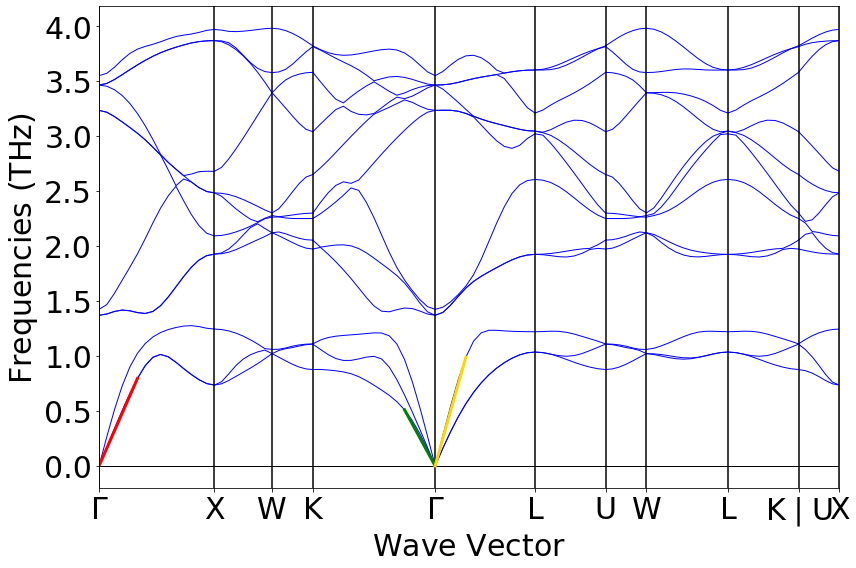

In [22]:
PhononBSPlotter(bandStructure).get_plot()

# représentation pente rouge
plt.plot([distances[0][0],distances[0][0]+distances[0][5]-distances[0][0]],[frequency[0][1][0],frequency[0][1][0]+frequency[0][1][5]-frequency[0][1][0]], color='red', lw=3)
# représentation pente verte
plt.plot([distances[3][12],distances[3][12]+distances[3][-1]-distances[3][12]],[frequency[3][0][12],frequency[3][0][12]+frequency[3][0][-1]-frequency[3][0][12]], color='green', lw=3)
# représentation pente jaune
plt.plot([distances[4][0], distances[4][0]+distances[4][4]-distances[4][0]],[frequency[4][2][0],frequency[4][2][0]+frequency[4][2][4]-frequency[4][2][0]], color='gold', lw=3)


Les pentes que nous avons obtenus pour approximer la vitesse du son semblent en accord avec les vitesses calculées. En effet, les deux premières vitesse sont proches l'une de l'autre (de même que leur inclinaison) alors que la troisième vitesse et donc la troisième pente est plus élévée.